# Mueller class

Mueller is a class that manages Mueller 4x4 polarization matrix. It allows the user to create and manipulate them. The difference between Mueller and Jones formalisms is that Mueller matrices can depolarize light, while Jones matrices can affect to the global phase of the electric field. However, Mueller objects store the global phase (if any) and use it when it is relevant.

## Creating an instance

An instance must be created before starting to operate with the Mueller matrix. The initialization accepts one argument: the name of the vector. This name will be used for printing:

In [1]:
%load_ext autoreload
%autoreload 2
# TODO: Remove autoreload

from py_pol.mueller import Mueller, create_Mueller, degrees
from py_pol.stokes import Stokes
import numpy as np

M1 = Mueller("Object 1")
print(M1)

Object 1 is empty



Several Mueller objects can be created at the same time using the function *create_Mueller*.

In [2]:
M2, M3 = create_Mueller(name=('Object 2', 'Object 3'))
print(M2, M3)

list_of_M = create_Mueller(N=3)
print(list_of_M)

Object 2 is empty
 Object 3 is empty

[M is empty
, M is empty
, M is empty
]


## Mueller class fields

Mueller class objects have some fields where some methods and information is stored:
* **M**: 4x4xN array containing all the Mueller matrices.
* **name**: Name of the object for print purposes.
* **shape**: Shape desired for the outputs.
* **size**: Number of stored Mueller matrices.
* **ndim**: Number of dimensions for representation purposes.
* **no_rotation**: If True, rotation method do not act upon the object. Useful for objects that shouldn't be rotated as mirrors.
* **_type**: Type of the object ('Mueller'). This is used for determining the object class as using isinstance may throw unexpected results in .ipynb files.


* **parameters**: parameters of the Mueller matrices.
* **checks**: checks of the Mueller matrices.
* **analysis**: analysis of the Mueller matrices.

In [3]:
M1 = Mueller("diattenuator_linear")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(M1.M)

[[[0.5]
  [0.5]
  [0. ]
  [0. ]]

 [[0.5]
  [0.5]
  [0. ]
  [0. ]]

 [[0. ]
  [0. ]
  [0. ]
  [0. ]]

 [[0. ]
  [0. ]
  [0. ]
  [0. ]]]


## Generating polarization devices

As shown in the previous example, the Mueller matrix is initialized with all elements equal to zero. There are many methods that can be used to generate a more desirable vector:

* **from_components**: Creates a Mueller matrix directly from the 16 $M_{ij}$ elements.
* **from_matrix**: Creates a Mueller object directly from a 4x4xN matrix.
* **from_normalized**: Creates a Mueller matrix directly from a normalized 4x4 matrix ($M_{norm} = M/M_{00}$).
* **from_Jones**: Creates a Mueller Matrix equivalent to a Jones matrix.
* **from_blocks**: Creates a Mueller matrix from the blocks of its decomposition.
* **from_covariance**: Creates a Mueller matrix from the equivalent covariant matrix.
* **from_inverse**: Creates a Mueller matrix from the inverse matrix.
* **from_list**: Creates a Jones_matrix object directly from a list of 4x4 numpy arrays.
* **vacuum**: Creates the matrix for vacuum.
* **mirror**: Creates the matrix for a mirror. NOTE: This matrix mus not be rotated.
* **filter_amplifier**: Creates the matrix for a neutral filter or amplifier element.
* **depolarizer_perfect**: Creates a perfect depolarizer.
* **depolarizer_diagonal**: Creates a depolarizer with elements just in the diagonal.
* **depolarizer_states**: Creates a general depolarizer from the diattenuation, polarizance and eigenstate vectors.
* **diattenuator_perfect**: Creates a perfect linear polarizer.
* **diattenuator_linear**: Creates a real diattenuator with perpendicular axes.
* **diattenuator_charac_angles**: Creates the most general homogeneous diattenuator with orthogonal eigenstates from the characteristic angles of the main eigenstate.
* **diattenuator_azimuth_ellipticity**: Creates the most general homogenous diattenuator from the characteristic angles of the main eigenstate.
* **diattenuator_vector**: Creates the most general homogenous diattenuator from the diattenuation vector.
* **quarter_waveplate**: Creates a perfect retarder with 90º retardance.
* **half_waveplate**: Creates a perfect retarder with 180º retardance.
* **retarder_linear**: Creates a linear retarder.
* **retarder_charac_angles**: Creates the most general homogeneous retarder from the characteristic angles of the fast eigenstate.
* **retarder_azimuth_ellipticity**: Creates the most general homogeneous retarder from the characteristic angles of the fast eigenstate.
* **retarder_from_vector**: Creates the most general homogeneous retarder from the retardance vector.
* **diattenuator_retarder_linear**: Creates an homogeneous linear diattenuator retarder with the same axes for diattenuation and retardance.
* **diattenuator_retarder_azimuth_ellipticity**: Creates the most general homogeneous diattenuator retarder with the same axes for diattenuation and retardance from the azimuth and ellipticity angle.
* **diattenuator_retarder_charac_angles**: Creates the most general homogeneous diattenuator retarder with the same axes for diattenuation and retardance from the characteristic angles.
* **general_eigenstates**: Generates the most general pure optical element from its eigenstates.

For a more detailed description of each method, refer to the individual documentation of each one.

Example: Linear diattenuator.

In [4]:
M1 = Mueller("Linear diattenuator")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(M1)

Linear diattenuator = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   



The previous example only stores one Mueller matrix. However, it is possible to store many Mueller matrices in the same object. This is useful specially when the same operation is performed upon all of them, as rotation. In this way, it is not required to use for loops, reducing significantly the computation time.

There are many ways of creating several Mueller matrices in the same object. The first way is creating an object with several identical matrices. This is performed using the *length* argument present in most creation methods:

In [5]:
M1 = Mueller("Linear diattenuator")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees, length=5)
print(M1)

Linear diattenuator = 
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



A second way of creating several matrices at the same time is using an array as one (or more) of the parameters of the creation methods. Take into account that, if you use this option, all parameters must have the same number of elements or just one element. Otherwise, the program will throw an exception.

In [6]:
angles = np.linspace(0, 90*degrees, 5)

M1 = Mueller("Linear diattenuator")
M1.diattenuator_linear(p1=1, p2=0, azimuth=angles)
print(M1)

Linear diattenuator = 
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.354 +0.354 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.500 -0.354 +0.354 +0.000]   [+0.500 -0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [-0.354 +0.250 -0.250 +0.000]   [-0.500 +0.500 -0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.354 -0.250 +0.250 +0.000]   [+0.000 -0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



If the parameters have dimension higher than 1, the program will store that information in order to make prints and plots. In that case, the *print* function separates the two components Jones vectors:

$$M=\left[\begin{array}{cccc}
M_{00} & M_{01} & M_{02} & M_{03}\\
M_{10} & M_{11} & M_{12} & M_{13}\\
M_{20} & M_{21} & M_{22} & M_{23}\\
M_{30} & M_{31} & M_{32} & M_{33}
\end{array}\right]$$

In [15]:
angles = np.random.rand(3,3) * 180*degrees

M1 = Mueller("Linear diattenuator")
M1.diattenuator_linear(p1=1, p2=0, azimuth=angles)
print(M1)

Linear diattenuator M00 =
 [[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
Linear diattenuator M01 =
 [[ 0.33880857  0.36122617  0.19703472]
 [ 0.01181186 -0.49973662  0.26271554]
 [ 0.4103074  -0.09323501  0.3599804 ]]
Linear diattenuator M02 =
 [[-0.36770742  0.34571036 -0.45954033]
 [-0.49986046  0.01622677 -0.42541808]
 [ 0.28574086 -0.49123033  0.34700736]]
Linear diattenuator M03 =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Linear diattenuator M10 =
 [[ 0.33880857  0.36122617  0.19703472]
 [ 0.01181186 -0.49973662  0.26271554]
 [ 0.4103074  -0.09323501  0.3599804 ]]
Linear diattenuator M11 =
 [[2.29582500e-01 2.60968696e-01 7.76453655e-02]
 [2.79040204e-04 4.99473384e-01 1.38038913e-01]
 [3.36704322e-01 1.73855355e-02 2.59171781e-01]]
Linear diattenuator M12 =
 [[-0.24916486  0.24975926 -0.18109081]
 [-0.01180857 -0.01621822 -0.22352788]
 [ 0.23448318  0.09159973  0.2498317 ]]
Linear diattenuator M13 =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Linear diattenuator M20 =
 [[-0.36770742  0.345

### Features of creation methods

Mueller formalism does not take into account the global phase of the light states. However, *Mueller* objects store the phase they add to light in the *global_phase* field. Use *None* if the global phase is unknown.

Most creation methods accept a *global_phase* argument that can be used to introduce it.

In [17]:
M1 = Mueller("Linear diattenuator")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees, global_phase=90*degrees)
print(M1.global_phase / degrees)

M1.remove_global_phase()
print(M1.global_phase / degrees)

[0.]
0.0


Some creation methods accept a *p1* and *p2* or a *Tmax* and *Tmin* parameters in order to set the electric field or intensity maximum and minimum transmissions respectively. If both sets of parameters are given together to the method, it will use the intensity transmissions, ignoring the field transmissions:

In [21]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(M1)

M1 = Mueller("Diattenuator 2")
M1.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=0*degrees)
print(M1)

M1 = Mueller("Diattenuator 3")
M1.diattenuator_linear(p1=1, p2=0, Tmax=0.8, Tmin=0.2, azimuth=0*degrees)
print(M1)

Diattenuator 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

Diattenuator 2 = 
[+0.500 +0.300 +0.000 +0.000]   
[+0.300 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.400 +0.000]   
[+0.000 +0.000 +0.000 +0.400]   

Diattenuator 3 = 
[+0.500 +0.300 +0.000 +0.000]   
[+0.300 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.400 +0.000]   
[+0.000 +0.000 +0.000 +0.400]   



## Basic operations

Some physical phenomena that affects optical objects are described by simple operations performed to their Mueller matrices.

### Addition of two Mueller matrices

If a light state gets through two (or more) optical objects in paralel (i.e., two halves of the light source gets twhrough two different optical elements), this phenomenom is represented by the sum of their Mueller matrices. If both of them have the same global phase, it is maintained. If not, it is changed to None (unknown).

Take into notice that the sum of two physically realizable Mueller matrices is not necessary a physically realizable Mueller matrix.

In [24]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
M2 = Mueller("Diattenuator 2")
M2.diattenuator_linear(Tmax=0.8, Tmin=0.2, azimuth=0*degrees)
print(M1+M2)

Diattenuator 1 + Diattenuator 2 = 
[+1.000 +0.800 +0.000 +0.000]   
[+0.800 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.400 +0.000]   
[+0.000 +0.000 +0.000 +0.400]   



### Multiply by a constant

A change in the absorption or gain of an optical object is represented by multiplying it by a constant. Take into account that Mueller formalism describes intensity transmissions, so the constant represents a variation in Intensity absorption or gain.

In [26]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(2 * M1)

print(M1*3)

print(M1/2)

2 * Diattenuator 1 = 
[+1.000 +1.000 +0.000 +0.000]   
[+1.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

3 * Diattenuator 1 = 
[+1.500 +1.500 +0.000 +0.000]   
[+1.500 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

Diattenuator 1 / 2 = 
[+0.250 +0.250 +0.000 +0.000]   
[+0.250 +0.250 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   



If the constant is complex, the constant phase will be added to the global phase of the light, while its absolute value will increase or decrease the light intensity. 

Take into account that real negative values are a special case of complex numbers whose phase is 180º.

In [30]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees, global_phase=0*degrees)
result = 2j * M1
print(result, result.global_phase/degrees)

result = -1 * M1
print(result, result.global_phase/degrees)

2j * Diattenuator 1 = 
[+1.000 +1.000 +0.000 +0.000]   
[+1.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
 [90.]
-1 * Diattenuator 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
 [180.]


### Multiplication of a Stokes vector by a Mueller matrix

This operation represents a light wave (described by the Stokes vector) getting through an optical element.

In [68]:
S1 = Stokes('Light source')
S1.linear_light(azimuth=0)
print(S1)
M1 = Mueller("Diattenuator 1")
M1.diattenuator_perfect(azimuth=45*degrees)
print(M1*S1)

Light source = 
[+1.000]   
[+1.000]   
[+0.000]   
[+0.000]   

Diattenuator 1 @ 45.00 deg * Light source = 
[+0.500]   
[+0.000]   
[+0.500]   
[+0.000]   



### Multiplication of Mueller matrices

When a light wave is going to get through two (or more) optical objects, the total system can be represented by a single Mueller matrix which is the product of the individual Mueller matrices. The left to right order of the matrices must be the last to first object to be transversed.

Example: "circular polarizer".

In [64]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_perfect(azimuth=0*degrees)
M2 = Mueller("Retarder 1")
M2.quarter_waveplate(azimuth=45*degrees)
print(M2*M1)

Retarder 1 @ 45.00 deg * Diattenuator 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   



### Equality

It is possible to compare two *Mueller* objects and tell if they are the same. It just compares the Mueller matrices and the global phase, not the rest of object fields.

In [61]:
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees, global_phase=0)
print(M1)

M2 = Mueller("Diattenuator 2")
M2.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees, global_phase=0)
print(M2)

print(M1 == M2)

M1.set_global_phase(90*degrees)
print(M1 == M2)

Diattenuator 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

Diattenuator 2 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

[ True]
[False]


### Operations and multidimensionality

The basic operations of *Stokes* objects are subject to the same casting rules as numpy arrays. This means that they can be easily used even if one or both elements of the operation have more than one element.

Here are some examples:

In [54]:
# sum
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
M2 = Mueller("Diattenuator 2")
M2.diattenuator_linear(Tmax=np.linspace(0.6, 1, 5), Tmin=0.2, azimuth=0*degrees)
print(M1+M2)

Diattenuator 1 + Diattenuator 2 = 
[+0.900 +0.700 +0.000 +0.000]   [+0.950 +0.750 +0.000 +0.000]   [+1.000 +0.800 +0.000 +0.000]   [+1.050 +0.850 +0.000 +0.000]   [+1.100 +0.900 +0.000 +0.000]   
[+0.700 +0.900 +0.000 +0.000]   [+0.750 +0.950 +0.000 +0.000]   [+0.800 +1.000 +0.000 +0.000]   [+0.850 +1.050 +0.000 +0.000]   [+0.900 +1.100 +0.000 +0.000]   
[+0.000 +0.000 +0.346 +0.000]   [+0.000 +0.000 +0.374 +0.000]   [+0.000 +0.000 +0.400 +0.000]   [+0.000 +0.000 +0.424 +0.000]   [+0.000 +0.000 +0.447 +0.000]   
[+0.000 +0.000 +0.000 +0.346]   [+0.000 +0.000 +0.000 +0.374]   [+0.000 +0.000 +0.000 +0.400]   [+0.000 +0.000 +0.000 +0.424]   [+0.000 +0.000 +0.000 +0.447]   



In [63]:
# product by a constant
M1 = Mueller("Diattenuator 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(np.linspace(0, 1, 5) * M1)

M = 
[+0.000 +0.000 +0.000 +0.000]   [+0.125 +0.125 +0.000 +0.000]   [+0.250 +0.250 +0.000 +0.000]   [+0.375 +0.375 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.125 +0.125 +0.000 +0.000]   [+0.250 +0.250 +0.000 +0.000]   [+0.375 +0.375 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



In [69]:
# Multiplication of Mueller matrices
M1 = Mueller("Diattenuator 1")
M1.diattenuator_perfect(azimuth=0*degrees)
M2 = Mueller("Retarder 1")
angles = np.linspace(0, 90*degrees, 5)
M2.quarter_waveplate(azimuth=angles)
print(M2*M1)

Retarder 1 * Diattenuator 1 = 
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   [+0.250 +0.250 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.250 +0.250 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.250 +0.250 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [-0.250 -0.250 +0.000 +0.000]   [-0.000 -0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.354 +0.354 +0.000 +0.000]   [+0.500 +0.500 +0.000 +0.000]   [+0.354 +0.354 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



## Mueller matrix manipulation

There are several operations that can be applied to a Mueller matrix.

* **update**: Recalculates some parameters as the number of elements, the dimensions associated to the shape, and such things.
* **clear**: Removes data and name form the object.
* **copy**: Creates a copy of the object.
* **stretch**: Stretches an object of size 1.
* **shape_like**: Takes the shape of another object to use as its own.
* **rotate**: Rotates the Mueller matrix.
* **sum**: Calculates the summatory of the Jones matrices in the object.
* **prod**: Calculates the product of the Jones matrices in the object.
* **flip**: Flips the object along some dimensions.
* **remove_global_phase**: Removes the phase introduced by the optical element.
* **add_global_phase**: Increases the phase introduced by the optical element.
* **set_global_phase**: Sets the phase introduced by the optical element.
* **reciprocal**: Flips the optical element so the light transverses it in the opposite direction.
* **transpose**: Transposes the Mueller matrix of the element.
* **inverse**: Calculates the inverse matrix of the Mueller matrix.
* **covariant_matrix**: This method calculates the covariant matrix of the Mueller matrix of the object.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [7]:
M1 = Mueller("Object 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
print(M1,'\n')

M1.rotate(angle=45*degrees)
print(M1)


Object 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
 

Object 1 @ 45.00 deg = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   



Most manipulation methods have the *keep* argument that specifies if the originial object must be preserved or transformed. If *keep* is *True* (default is *False*), a new object is created:

In [9]:
M1 = Mueller("Object 1")
M1.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)
M2 = M1.rotate(angle=45*degrees, keep=True)
print(M1, M2)

M2 = M1.rotate(angle=45*degrees, keep=False)
print(M1, M2)

Object 1 = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
 Object 1 @ 45.00 deg = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

Object 1 @ 45.00 deg = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
 Object 1 @ 45.00 deg = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   



*Mueller* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [14]:
M = np.random.rand(4, 4, 5)
M1 = Mueller('Original')
M1.from_matrix(M)
print(M1)

M2 = M1[1:3]
print(M2)

Original = 
[+0.440 +0.694 +0.345 +0.345]   [+0.515 +0.932 +0.957 +0.914]   [+0.418 +0.184 +0.676 +0.231]   [+0.230 +0.551 +0.149 +0.486]   [+0.185 +0.216 +0.085 +0.900]   
[+0.239 +0.824 +0.757 +0.670]   [+0.044 +0.925 +0.199 +0.659]   [+0.821 +0.076 +0.849 +0.025]   [+0.183 +0.331 +0.895 +0.013]   [+0.752 +0.378 +0.887 +0.192]   
[+0.438 +0.402 +0.126 +0.535]   [+0.287 +0.435 +0.952 +0.769]   [+0.563 +0.830 +0.916 +0.836]   [+0.731 +0.114 +0.957 +0.594]   [+0.455 +0.819 +0.030 +0.088]   
[+0.360 +0.557 +0.991 +0.366]   [+0.170 +0.760 +0.761 +0.418]   [+0.173 +0.685 +0.365 +0.263]   [+0.654 +0.422 +0.741 +0.116]   [+0.313 +0.957 +0.665 +0.022]   

Original_picked = 
[+0.515 +0.932 +0.957 +0.914]   [+0.418 +0.184 +0.676 +0.231]   
[+0.044 +0.925 +0.199 +0.659]   [+0.821 +0.076 +0.849 +0.025]   
[+0.287 +0.435 +0.952 +0.769]   [+0.563 +0.830 +0.916 +0.836]   
[+0.170 +0.760 +0.761 +0.418]   [+0.173 +0.685 +0.365 +0.263]   



In [16]:
M1 = Mueller('Original')
angles = np.linspace(0,180*degrees, 25)
M1.diattenuator_perfect(azimuth=angles, shape=[5,5])
print(M1)

M2 = M1[1:3,2:4]
print(M2)

Original M00 =
 [[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]]
Original M01 =
 [[ 5.00000000e-01  4.82962913e-01  4.33012702e-01  3.53553391e-01
   2.50000000e-01]
 [ 1.29409523e-01  3.06161700e-17 -1.29409523e-01 -2.50000000e-01
  -3.53553391e-01]
 [-4.33012702e-01 -4.82962913e-01 -5.00000000e-01 -4.82962913e-01
  -4.33012702e-01]
 [-3.53553391e-01 -2.50000000e-01 -1.29409523e-01 -9.18485099e-17
   1.29409523e-01]
 [ 2.50000000e-01  3.53553391e-01  4.33012702e-01  4.82962913e-01
   5.00000000e-01]]
Original M02 =
 [[ 0.00000000e+00  1.29409523e-01  2.50000000e-01  3.53553391e-01
   4.33012702e-01]
 [ 4.82962913e-01  5.00000000e-01  4.82962913e-01  4.33012702e-01
   3.53553391e-01]
 [ 2.50000000e-01  1.29409523e-01  6.12323400e-17 -1.29409523e-01
  -2.50000000e-01]
 [-3.53553391e-01 -4.33012702e-01 -4.82962913e-01 -5.00000000e-01
  -4.82962913e-01]
 [-4.33012702e-01 -3.53553391e-01 -2.50000000e-01 -1.29409523e-01
  -1

# Parameters of Mueller matrices

Several parameters can be measured from a Mueller Matrix. They are implemented in the independent class Parameters_Jones_Matrix, which is stored in the parameters field of Jones_matrix class.

* **matrix**:  Gets a numpy array with all the matrices.
* **components**: Extracts the four components of the Mueller matrix.
* **global_phase**: Extracts the global phase introduced by the object.
* **blocks**: Method that divides a mueller matrix in their blocks: mean transmission ($M_{00}$), diattenuation and polarizance vectors and small matrix m.
* **diattenuation_vector**: Extracts the 3xN array of diattenuation vectors.
* **polarizance_vector**: Extracts the 3xN array of polarizance vectors.
* **small_matrix**: Extracts the 3x3xN array of small matrix m.
* **retardance_vector**: Extracts the 3xN array of retardance vectors (if exists).
* **mean_transmission**: Calculates the mean transmission coefficient.
* **transmissions**: Calculates the maximum and minimum transmissions.
* **inhomogeneity**: Calculates the inhomogeneity parameter.
* **diattenuation**: Calculates the diattenuation of a Mueller matrix.
* **diattenuation_linear**: Calculates the linear diattenuation of a Mueller matrix.
* **diattenuation_circular**: Calculates the circular diattenuation of a Mueller matrix.
* **polarizance**: Calculates the polarizance of a Mueller matrix.
* **polarizance_linear**: Calculates the linear polarizance of a Mueller matrix.
* **polarizance_circular**: Calculates the delay of the matrix.
* **degree_polarizance**: Calculates the degree of polarizance.
* **spheric_purity**: Calculates the spheric purity grade.
* **retardance**: Calculates the retardance (also refered as delay) of the Mueller matrix of a pure retarder.
* **polarimetric_purity**: Calculates the degree of polarimetric purity of a Mueller matrix.
* **depolarization_index**: Calculates the depolarization_index of a Mueller matrix.
* **polarimetric_purity_indices**: Calculates the polarimetric purity indices of a Mueller matrix.
* **eig**: Calculates the eigenvalues and eigenstates (eigenvectors) of the Mueller matrices.
* **eigenvalues**: Calculates the eigenvalues and of the Mueller matrices.
* **eigenvectors**: Calculates the eigenvectors of the Mueller matrices.
* **eigenstates**: Calculates the eigenstates (Stokes vectors of the eigenvectors) of the Mueller matrices.
* **det**: Calculates the determinant and of the Mueller matrices.
* **trace**: Calculates the trace of the Mueller matrices.
* **norm**: Calculates the norm of the Mueller matrices.
* **get_all**: Returns a dictionary with all the parameters of the object.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [18]:
M1 = Mueller("Diattenuator retarder")
M1.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5)
ret = M1.parameters.retardance()
print("Retardance = {:2.1f}º".format(ret/degrees))

Retardance = 90.0º


When several Stokes vectors are stored in the object, setting *verbose* argument to *True* makes the method print the values in screen. Also, 1D or 2D figures can be shown if the *draw* argument is set to *True*:

In [20]:
M1 = Mueller("Diattenuator retarder")
M1.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5)
ret = M1.parameters.retardance(verbose=True)

The retardance of Diattenuator retarder is (deg):
90.0



The retardance of Diattenuator retarder is (deg):
The mean value is 89.14306286525556 +- 36.17075878552775


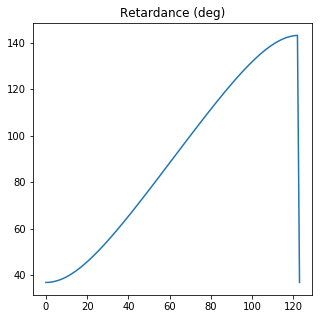

In [22]:
M1 = Mueller("Diattenuator retarder")
ret = np.linspace(0, 180*degrees, 124)
M1.diattenuator_retarder_linear(R=ret, p1=1, p2=0.5)
ret = M1.parameters.retardance(draw=True)

d:\codigo_ucm\py_pol\py_pol\mueller.py:2107: RuntimeWarning: invalid value encountered in true_divide
  Dv[1, cond] = Dv[1, cond] / d[cond]


The field transmissions of Diattenuator are:
The mean value of param Maximum (int.) is 0.75 +- 0.14550631161866215
The mean value of param Minimum (int.) is 0.25 +- 0.14550631161866218


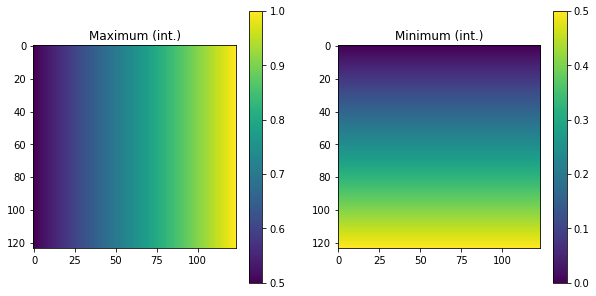

In [56]:
M1 = Mueller("Diattenuator")
p1 = np.linspace(0.5, 1, 124)
p2 = np.linspace(0, 0.5, 124)
P1, P2 = np.meshgrid(p1, p2)
M1.diattenuator_azimuth_ellipticity(p1=P1, p2=P2, azimuth=30*degrees, ellipticity=15*degrees)
p1, p2 = M1.parameters.transmissions(kind='Field', draw=True)

There is a function in Parameters_Mueller class, *get_all* that will compute all the parameters available and stores in a dictionary *dict_params*. Info about dict parameters can be revised using the *print* function.

Example:

In [34]:
M1 = Mueller("Diattenuator retarder")
M1.diattenuator_retarder_linear(R=90*degrees, p1=1, p2=0.5)
print(M1.parameters)

The mean transmission of Diattenuator retarder is:
0.625
Low dimensionality, figure not available.

The inhomogeneity parameter of Diattenuator retarder is:
nan
Low dimensionality, figure not available.

The diattenuation of Diattenuator retarder is:
1.0
Low dimensionality, figure not available.

The linear diattenuation of Diattenuator retarder is:
1.0
Low dimensionality, figure not available.

The circular diattenuation of Diattenuator retarder is:
0.0
Low dimensionality, figure not available.

The polarizance of Diattenuator retarder is:
1.0
Low dimensionality, figure not available.

The linear polarizance of Diattenuator retarder is:
1.0
Low dimensionality, figure not available.

The circular polarizance of Diattenuator retarder is:
0.0
Low dimensionality, figure not available.

The degree of spherical purity of Diattenuator retarder is:
0.8717797887081348
Low dimensionality, figure not available.

The retardance of Diattenuator retarder is (deg):
90.0
Low dimensionality, figure no

d:\codigo_ucm\py_pol\py_pol\mueller.py:3306: RuntimeWarning: invalid value encountered in sqrt
  obj=self.parent)
d:\codigo_ucm\py_pol\py_pol\mueller.py:3753: RuntimeWarning: invalid value encountered in sqrt
  """


# Checks on Mueller Matrices

There are many types of Mueller matrices. The Check_Mueller calss implements all the checks that can be performed in order to clasify a Mueller matrix. They are stored in the *checks* field of Mueller class.

* **is_physical**:  Conditions of physical realizability.
* **is_non_depolarizing / is_pure**: Checks if matrix is non-depolarizing.
* **is_homogeneous**: Checks if the matrix is homogeneous (eigenstates are orthogonal). It is implemented in two different ways.
* **is_retarder**: Checks if the matrix M corresponds to a pure retarder.
* **is_diattenuator / is_polarizer**: Checks if the matrix M corresponds to a pure homogeneous diattenuator.
* **is_depolarizer**: Checks if the object corresponds to a depolarizer.
* **is_singular**: Checks if the matrix is singular (at least one of its eigenvalues is 0).
* **is_symmetric**: Checks if the Mueller matrices are symmetric.
* **get_all**: Returns a dictionary with all the checks of the object.

Example: linear diattenuator.

In [55]:
M1 = Mueller("Diattenuator")
M1.diattenuator_linear(p1=1, p2=0.5)
print(M1)

M1.parameters.inhomogeneity(verbose=True)

c1 = M1.checks.is_physical(verbose=True)
c2 = M1.checks.is_homogeneous(verbose=True)
c3 = M1.checks.is_retarder(verbose=True)

Diattenuator = 
[+0.625 +0.375 +0.000 +0.000]   
[+0.375 +0.625 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   

The inhomogeneity parameter of Diattenuator is:
0.0

Diattenuator is physically realizable:
True

Diattenuator is homogeneous:
True

Diattenuator is a retarder:
False



1D and 2D plot draws are also implemented for this class:

d:\codigo_ucm\py_pol\py_pol\jones_matrix.py:517: ComplexWarning: Casting complex values to real discards the imaginary part
  self.M = np.array(self.M, dtype=float)


Diattenuator is a diattenuator:
The mean value is 0.9999349635796045 +- 0.008064253881137646


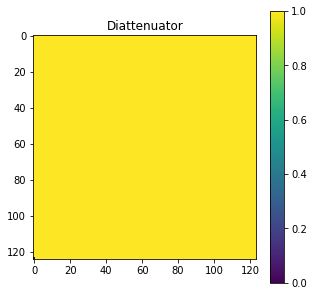

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

In [58]:
M1 = Mueller("Diattenuator")
p1 = np.linspace(0.5, 1, 124)
p2 = np.linspace(0, 0.5, 124)
P1, P2 = np.meshgrid(p1, p2)
M1.diattenuator_linear(p1=P1, p2=P2, azimuth=30*degrees)
M1.checks.is_diattenuator(draw=True)

There is a function in Checks_Mueller class, **.get_all()** that will compute all the checks available and store them in a dictionary **.dict_params()**. Info about dict checks can be revised using the **print** function.

Example:

In [73]:
M1 = Mueller("Diattenuator")
M1.diattenuator_linear(p1=1, p2=0.5)
print(M1.checks)

Diattenuator is physically realizable:
True
Low dimensionality, figure not available.

Diattenuator is pure (non-depolarizing):
True
Low dimensionality, figure not available.

Diattenuator is homogeneous:
True
Low dimensionality, figure not available.

Diattenuator is a retarder:
False
Low dimensionality, figure not available.

Diattenuator is a diattenuator:
[ True]
Low dimensionality, figure not available.

Diattenuator is a depolarizer:
[False]
Low dimensionality, figure not available.

Diattenuator is singular:
False
Low dimensionality, figure not available.

Diattenuator is symmetric:
True
Low dimensionality, figure not available.




# Analysis of Mueller matrices

Several analysis can be performed from a Mueller Matrix. They are implemented in the independent class Analysis_Mueller, which is stored in the *analysis* field of Mueller class.

* **diattenuator**: Calculates all the parameters from the Mueller Matrix of a diattenuator.
* **polarizer**: Calculates all the parameters from the Mueller Matrix of a diattenuator using the polarizance vector. If the polarizer is homogeneous, this is equivalent to the previous method.
* **retarder**: Calculates all the parameters from the Mueller Matrix of a retarder.
* **depolarizer**: Calculates some of the parameters from the Mueller matrix of a diattenuator.
* **filter_physical_conditions**: Method that filters experimental errors by forcing the Mueller matrix M to fulfill the conditions necessary for a matrix to be physicall.
* **filter_purify_number**: Purifies a Mueller matrix by choosing the number of eigenvalues of the covariant matrix that will be made 0.
* **filter_purify_threshold**: Purifies a Mueller matrix by making 0 the eigenvalues of the covariant matrix lower than a certain threshold.
* **decompose_pure**: Polar decomposition of a pure Mueller matrix in a retarder and a diattenuator.
* **decompose_polar**: Polar decomposition of a general Mueller matrix in a depolarizer, retarder and a diattenuator.

In [75]:
M1 = Mueller("Diattenuator")
M1.diattenuator_azimuth_ellipticity(p1=1, p2=0.5, azimuth=75*degrees, ellipticity=30*degrees)
print(M1)
M1.analysis.diattenuator(verbose=True);

Diattenuator = 
[+0.625 -0.162 +0.094 +0.325]   
[-0.162 +0.523 -0.014 -0.047]   
[+0.094 -0.014 +0.508 +0.027]   
[+0.325 -0.047 +0.027 +0.594]   


Analysis of Diattenuator as diattenuator:

- Transmissions of Diattenuator are:
  Max. transmission
1.0
  Min. transmission
0.25
  p1
1.0
  p2
0.5

- Angles of Diattenuator are:
  Alpha
[57.82945314]
  Delay
[73.89788625]
  Azimuth
[75.]
  Ellipticity angle
[30.]

